# User Based Collaborative Filtering

In [1]:
import pandas as pd
import numpy as np

In [2]:
movies = pd.read_csv('/datasets/movies/movies.csv')
ratings = pd.read_csv('/datasets/movies/ratings.csv')

In [18]:
#ratings.head()

In [8]:
ratings['userId'].nunique(), ratings['movieId'].nunique()

(671, 9066)

In [10]:
ui_matrix = ratings.pivot_table(index='userId',
                                columns='movieId',
                                values='rating')

In [20]:
ui_matrix.shape

(671, 9066)

In [27]:
ratings['userId'].value_counts().mean()

149.03725782414307

In [57]:
ui_matrix_norm = ui_matrix.apply(lambda v: (v - v.mean()) / v.std(),
                                axis=1).fillna(0)

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

In [70]:
users_sim = pd.DataFrame(cosine_similarity(ui_matrix_norm),
                         index=ui_matrix_norm.index,
                         columns=ui_matrix_norm.index)

In [79]:
userId = 10
neighs = users_sim[userId].drop(userId).sort_values(ascending=False).head(3)
neighs = neighs.index
neighs

Int64Index([550, 626, 218], dtype='int64', name='userId')

In [93]:
user_movies = ui_matrix.loc[userId]
movies_not_watched = user_movies[pd.isnull(user_movies)]
#movies_not_watched.index

In [102]:
neighs_matrix = ui_matrix_norm.loc[neighs]
movies_predictions = neighs_matrix.mean()[movies_not_watched.index]
movies_recom = movies_predictions.sort_values(ascending=False).head()
movies_recom = movies_recom.index
movies_recom

Int64Index([377, 2858, 2762, 5618, 1233], dtype='int64', name='movieId')

In [114]:
movies[movies['movieId'].isin(movies_recom)]['title']

341                                          Speed (1994)
988                          Boot, Das (Boat, The) (1981)
2212                              Sixth Sense, The (1999)
2288                               American Beauty (1999)
4231    Spirited Away (Sen to Chihiro no kamikakushi) ...
Name: title, dtype: object

In [120]:
ui_matrix_norm = ui_matrix.apply(lambda v: (v - v.mean()) / v.std(),
                                axis=1).fillna(0)
users_sim = pd.DataFrame(cosine_similarity(ui_matrix_norm),
                         index=ui_matrix_norm.index,
                         columns=ui_matrix_norm.index)

In [119]:
userId = 300
neighs = users_sim[userId].drop(userId).sort_values(
    ascending=False).head(3).index
movies_not_watched = user_movies[pd.isnull(ui_matrix.loc[userId])]

neighs_matrix = ui_matrix_norm.loc[neighs]
movies_predictions = neighs_matrix.mean()[movies_not_watched.index]
movies_recom = movies_predictions.sort_values(
    ascending=False).head().index
movies[movies['movieId'].isin(movies_recom)]['title']

262                    Outbreak (1995)
314    Clear and Present Danger (1994)
341                       Speed (1994)
406               Fugitive, The (1993)
523          Dances with Wolves (1990)
Name: title, dtype: object

# Gradient Descent

In [123]:
adv = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/Advertising.csv')
adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [127]:
m = 0.1
c = 10
N = adv.shape[0]
y_pred = m * adv['TV'] + c
rmse = np.square(adv['TV'] - y_pred).sum() / N
rmse = np.sqrt(rmse)
rmse

144.5934454928715

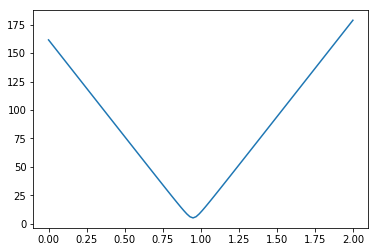

In [133]:
c = 10
N = adv.shape[0]

errors = []
m_values = []
for m in np.linspace(0,2,100):
    y_pred = m * adv['TV'] + c
    rmse = np.square(adv['TV'] - y_pred).sum() / N
    rmse = np.sqrt(rmse)
    errors.append(rmse)
    m_values.append(m)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(m_values, errors)

In [138]:
#c = 10
N = adv.shape[0]

errors = []
m_values = []
c_values = []
for m in np.linspace(0,2,100):
    for c in np.linspace(-10, 10, 100):
        y_pred = m * adv['TV'] + c
        rmse = np.square(adv['TV'] - y_pred).sum() / N
        rmse = np.sqrt(rmse)
        errors.append(rmse)
        m_values.append(m)
        c_values.append(c)

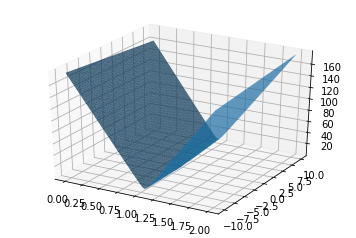

In [139]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(m_values, c_values, errors)